In [27]:
DATASET = '/home/swei20/sketch/hill-sketch/data/simple/kmat.xlsx'

In [5]:
import os, sys
import getpass
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import h5py
import copy
import logging

In [9]:
sys.path.insert(0, '../..')

In [164]:
%load_ext autoreload
%autoreload 2

In [ ]:
data = load

In [ ]:
from sklearn.decomposition import PCA

In [117]:
data = data.rename(columns={'CID_10': 'C10'})

In [205]:
def run_hill_simple(DATASET, nCluster=10):
    data,keep_columns = load_data(DATASET)
    matPCA = get_pca(data,dim=6)
    matTSNE = get_tsne(matPCA)    
    cluster_id, min_dist, kmap = get_cluster(matTSNE, nCluster)
    data['t1'] = matTSNE[:,0]
    data['t2'] = matTSNE[:,1]    
    data[f'C{nCluster}'] = cluster_id
    data[f'M{nCluster}'] = min_dist
    grouped = data.groupby(['C10'])
    cid = grouped['M10'].idxmin().values
    print('center Id:', cid)
    cMat = data.iloc[cid][keep_columns]
    return data,kmap,cMat

In [201]:
data,kmap,cMat = run_hill_simple(DATASET, nCluster=10)

Index(['k11', 'k12', 'k13', 'k14', 'k21', 'k22', 'k23', 'k24', 'k31', 'k32',
       'k33', 'k34', 'k41', 'k42', 'k43', 'k44', 'k55', 'k56', 'k65', 'k66'],
      dtype='object')
(6400, 6)
(6400, 2)


In [202]:
def plot_data(data,kmap):
    sns.scatterplot(
            x='t1', y='t2',
            hue= kmap.labels_+1 , marker='x',s=5,
            palette=sns.color_palette("muted", kmap.n_clusters),
            data=data,
            legend="full")
    plt.scatter(kmap.cluster_centers_[:,0],kmap.cluster_centers_[:,1], c='r')    

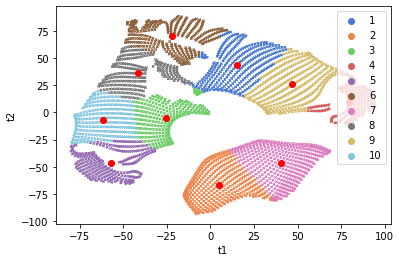

In [203]:
plot_data(data,kmap)

In [204]:
cMat

,k11,k12,k13,k14,k21,k22,k23,k24,k31,k32,k33,k34,k41,k42,k43,k44,k55,k56,k65,k66
1606,177434.398354,124039.805090,97921.942955,5800.378812,104420.035597,240501.590189,105127.097991,7616.507258,96857.606621,124321.365957,182878.616583,9443.430426,2383.654313,4944.960501,7167.649114,58868.394383,41628.173131,7877.306486,6916.424521,65257.804658
2207,483915.293176,94970.877323,98704.544544,2042.558886,111918.232286,283994.282508,99736.713049,3359.761961,113342.940419,95889.226785,295081.465128,4810.473581,1169.435754,1801.536176,4140.986063,66095.312300,89513.121003,3228.157778,3307.902521,85502.101950
5144,177260.574725,93020.436092,128058.022060,-14521.687238,94489.669396,186034.314138,109132.925627,-31681.579407,106276.726855,87555.203780,267508.315726,-11029.265410,-6259.598301,-27725.799009,-4082.534176,47738.231948,69430.411255,-16969.980484,-20304.985142,36493.462253
3508,178345.217047,149219.768349,77370.331716,2240.199976,113308.794452,312791.274524,78005.903649,178.887678,90647.726275,126090.397092,149553.895515,6409.935781,1116.336158,58.151946,5614.543131,52778.269500,24768.081131,3814.254375,2623.510924,87156.636014
594,178167.707293,80371.520830,145316.558193,2212.150244,91346.284684,159058.433106,120135.604637,5561.263057,112088.148532,77328.392865,307266.037107,945.061189,1128.084073,4540.600665,1191.791788,49971.929544,83879.822886,2587.534829,3618.697782,27068.068760
487,177344.491812,110274.200177,111230.685125,2528.315526,100382.440792,193294.525259,131817.005964,3765.955511,100630.770420,131041.357614,195332.067932,3670.266623,874.919456,2215.001343,2230.927650,71468.509093,53615.359321,3035.561316,3049.728810,52758.899714
2588,483914.880461,98258.909707,95414.414934,-1910.886661,113175.018815,294488.164428,95629.228907,-4352.074437,112084.503028,98547.474402,286028.430830,-3291.472206,-1097.849746,-3642.404218,-1936.351610,65611.883003,85978.269497,-3086.363019,-3029.478564,89034.420350
384,177381.196189,103364.506747,118326.892926,-3329.620247,98506.679273,186221.386318,129358.407487,-4948.423961,102614.485988,117791.868821,218661.865825,-4844.576765,-1273.881319,-3329.558125,-3143.707329,65392.679125,60061.980292,-4024.826214,-4335.663485,46519.941456
2399,177882.585127,138022.415593,86216.806740,-270.354753,109396.085578,286472.663027,84441.969733,-245.689757,93199.753030,119475.618129,169136.873621,-549.471281,-131.230439,-243.705390,-423.145950,50773.903633,31767.247355,-412.363697,-316.808241,77606.895125
666,177679.645797,89383.645038,133824.335112,6124.588192,94174.630171,172270.211247,121296.147414,12357.357777,107824.328056,90622.862394,272304.838210,5656.136905,2759.521737,10188.994774,3833.596233,52835.933124,74085.548108,7183.344541,9000.659032,34170.320250


In [211]:
def save_cluster_ids(data, nCluster, outDir=None,name='kMat_C10'):
    if outDir is None: outDir = './'
    lbl = data[f'C{nCluster}']
    for i in range(1,nCluster+1):
        c = np.where(lbl==i)[0]+1   
        print(f'Cluster{i}: {c[:3]}..')
        np.savetxt(f'{outDir}{name}_c{i}.txt', c, fmt="%d")    
def save_centers(cMat,outDir=None,name='cMat_C10'):
    if outDir is None: outDir = './'
    cMat.to_csv(f'{outDir}{name}.csv')  

### 1. load data

In [13]:
DATASET_LARGE = '/home/swei20/sketch/hill-sketch/data/sketch/SST.xlsx'

In [17]:
data = pd.read_excel(DATASET_LARGE),columns = [f'k{i}' for i in range(36)]) 

In [19]:
data.shape

(16383, 36)

In [18]:
data

,6409800.00,2300200.00,2116500.00,108.27,115000.00,-311140.00,2334800.00,6245400.00,2078900.00,-134700.00,...,-150850.00,193980.00,1796500.00,37896.00,64917.00,-168080.00,344330.00,1831700.00,193640.00,158460.00
0,6342200,2355900,2102700,28372.0,66519.0,-317250.0,2399000,6231400,2116900,-91513.0,...,-184870.0,184210.0,1764700,45093.0,82611.0,-134560.0,209620.0,1839900,188490.0,174910.0
1,6272300,2351500,2033500,-13374.0,42433.0,-369820.0,2407800,6229700,2029300,-81059.0,...,-225270.0,204090.0,1721100,24477.0,66234.0,-137690.0,265420.0,1807200,208490.0,153800.0
2,6327900,2368000,2110600,15398.0,74040.0,-377910.0,2401700,6208900,2056500,-110480.0,...,-283550.0,160160.0,1796200,16756.0,62592.0,-166480.0,221110.0,1797400,171080.0,162610.0
3,5574100,2236300,1694300,-138780.0,-266900.0,-434780.0,2290600,5714600,1473600,-47571.0,...,-669420.0,108840.0,1865900,133580.0,99937.0,42500.0,734960.0,1946900,124900.0,4585.4
4,5764900,2268700,1728300,-133730.0,-189150.0,-407870.0,2334300,5890300,1554500,-86934.0,...,-578680.0,131710.0,1767300,83289.0,70404.0,-48755.0,664540.0,1850100,144230.0,53279.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16378,6949300,2206300,2406500,183570.0,478280.0,251270.0,2140900,6264900,2278600,-170100.0,...,247470.0,214600.0,2052500,249500.0,268880.0,-88171.0,312700.0,1898900,227160.0,245310.0
16379,6580100,2446700,2281600,274310.0,-229540.0,15684.0,2447500,6191600,2395900,-360570.0,...,-71007.0,-226130.0,1722200,154290.0,179410.0,-332810.0,-227800.0,1856300,-175450.0,224300.0
16380,6454600,2478500,2233900,301340.0,-274120.0,3984.9,2535700,6198000,2439100,-390060.0,...,-63779.0,-247050.0,1639800,154840.0,171630.0,-380520.0,-279570.0,1886500,-196020.0,228400.0
16381,6582500,2447700,2240500,293710.0,-258410.0,38157.0,2480800,6235700,2410200,-387840.0,...,-38686.0,-243080.0,1637000,151180.0,169750.0,-373740.0,-244440.0,1837500,-195070.0,220120.0


In [23]:
DATASET[-3:]

'lsx'

In [48]:
mat = data_centered.values

In [49]:
cov = mat.T.dot(mat)

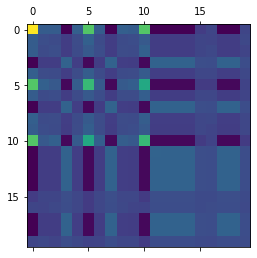

In [50]:
plt.matshow(cov)

In [46]:
data_centered = data - data.mean().mean()

In [47]:
data_centered

,k11,k12,k13,k14,k21,k22,k23,k24,k31,k32,k33,k34,k41,k42,k43,k44,k55,k56,k65,k66
0,98778.610320,30376.368884,30376.368884,-59405.713774,21387.845942,108312.153030,53868.711099,-50942.042432,21387.845942,53868.711099,108312.153030,-50942.042432,-75182.146407,-71778.799005,-71778.799005,-15918.298194,-27355.776659,-71670.493580,-71670.493580,-27355.776659
1,100014.229841,33291.968461,33739.606302,-74035.942339,23384.627854,112286.293985,60041.276260,-69430.118819,23025.239089,58469.863019,112031.462628,-75484.050061,-77282.658152,-77485.623770,-76745.786559,-2930.097264,-25013.506060,-76542.108919,-77108.107606,-22740.004306
2,99974.961877,33144.493564,33687.539886,-76514.958823,23201.760980,112129.104234,59269.222602,-74475.278040,23092.611953,58193.303073,112650.379769,-77730.115793,-77316.505287,-77139.217612,-77264.187930,-4497.954461,-24425.171328,-77139.895034,-77148.792025,-23840.027677
3,99966.467501,32950.391380,33838.477645,-77002.816162,23083.496587,111854.483301,58942.879537,-76214.032719,23185.892886,57897.035229,113420.657421,-77426.235640,-77347.261070,-77368.192205,-77191.499756,-4123.633779,-24055.088043,-77211.620148,-77220.899178,-24270.543246
4,99964.235301,32687.185542,34090.340493,-77136.900788,22991.381851,111680.331687,58648.947407,-76668.674837,23271.442328,57297.052024,114455.362633,-77365.960069,-77342.654945,-77239.686932,-77296.598865,-4113.468820,-23720.104411,-77217.656926,-77219.199954,-24623.296923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,99964.235301,32687.185542,34090.340493,-77136.900788,22991.381851,111680.331687,58648.947407,-76668.674837,23271.442328,57297.052024,114455.362633,-77365.960069,-77342.654945,-77239.686932,-77296.598865,-4113.468820,-23720.104411,-77217.656926,-77219.199954,-24623.296923
6396,99966.467501,32950.391380,33838.477645,-77002.816162,23083.496587,111854.483301,58942.879537,-76214.032719,23185.892886,57897.035229,113420.657421,-77426.235640,-77347.261070,-77368.192205,-77191.499756,-4123.633779,-24055.088043,-77211.620148,-77220.899178,-24270.543246
6397,99974.961877,33144.493564,33687.539886,-76514.958823,23201.760980,112129.104234,59269.222602,-74475.278040,23092.611953,58193.303073,112650.379769,-77730.115793,-77316.505287,-77139.217612,-77264.187930,-4497.954461,-24425.171328,-77139.895034,-77148.792025,-23840.027677
6398,100014.229841,33291.968461,33739.606302,-74035.942339,23384.627854,112286.293985,60041.276260,-69430.118819,23025.239089,58469.863019,112031.462628,-75484.050061,-77282.658152,-77485.623770,-76745.786559,-2930.097264,-25013.506060,-76542.108919,-77108.107606,-22740.004306


### 2. dim reduction via SVD (PCA)

In [74]:
from sklearn.decomposition import PCA

In [72]:
def get_pca(mat, dim=6):
    pca = PCA(n_components=6)    
    matPca=pca.fit_transform(mat)    
    print(matPca.shape)
    return matPca

In [51]:
 U, S, V = np.linalg.svd(cov)

In [71]:
def run_step_pc(cov, pca_comp):
    # use svd since its commputational faster
    print(f"=============== PCA N_component: {pca_comp} ===============")
    u,s,v = np.linalg.svd(cov)
#     assert np.allclose(u, v.T)
    print('Explained Variance Ratio', np.round(s/sum(s),3))
    pc = u[:,:pca_comp]
    # np.savetxt('eval.txt',
    return pc
def run_step_pc_transform(x, data1Ds, pc):
    return data1Ds[x].dot(pc)

In [65]:
pca_comp = 6
pc = run_step_pc(cov, pca_comp)

=============== PCA N_component: 6 ===============
Explained Variance Ratio [0.885 0.073 0.037 0.003 0.001 0.001 0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.   ]


In [67]:
matPCA = data.dot(pc)

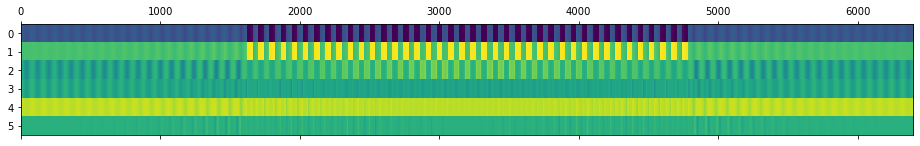

In [78]:
plt.matshow(matPCA.T,aspect='auto')

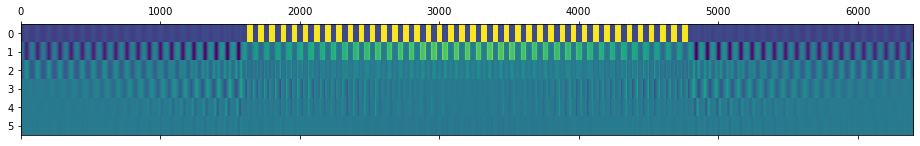

In [77]:
plt.matshow(matPca.T,aspect='auto')

In [75]:
matPca = get_pca(data,dim=6)

(6400, 6)


In [85]:
def get_encode_stream(df_norm, base,dtype):
    mat=(df_norm*(base-1)).round()
    assert (mat.min().min()>=0) & (mat.max().max()<=base-1)
    mat_encode=horner_encode(mat,base,dtype) 
    mat_decode=horner_decode(mat_encode,base,len(mat.keys()),dtype)  
    assert (mat_decode.min().min()>=0) & (mat_decode.max().max()<=base-1)
    try:
        assert np.sum(abs(mat_decode-mat.values))<=0.0001    
    except:
        print(np.nonzero(np.sum(abs(mat_decode-mat.values),axis=1)), np.sum(abs(mat_decode-mat.values)))
        raise 'overflow, try lower base or fewer features'     
    return mat_encode

In [92]:
def horner_encode(mat,base,dtype):
    r,c=mat.shape
    print('samples:',r,'ftrs:',c, 'base:',base)
    encode=np.zeros((r),dtype=dtype)
    for ii, key in enumerate(mat.keys()):
        val=(mat[key].values).astype(dtype)
        encode= encode + val*(base**ii)
#         print(ii,val, encode)
    return encode

def horner_decode(encode,base, dim,dtype):
    arr=copy.deepcopy(np.array(encode))
    decode=np.zeros((len(arr),dim), dtype=dtype)
    for ii in range(dim-1,-1,-1):
        digits=arr//(base**ii)
        decode[:,ii]=digits
        arr= arr% (base**ii)
#         print(digits,arr)
    return decode
def get_exact_HH(stream,topk):
    print(f'=============exact counting HHs==============')
    t0=time.time()
    exactHH=np.array(Counter(stream).most_common())
    t=time.time()-t0
    print('exact counting time:{:.2f}'.format(t))
    return exactHH[:,0], exactHH[:,1], t

def get_HH_pd(stream,base,ftr_len, dtype, exact, topk, r=16, d=1000000,c=None,device=None):
    if exact:
        HH,freq,t=get_exact_HH(stream,topk)
        HHfreq=np.vstack((HH,freq))
    else:
        HH,freq,t=get_CS_HH(stream,d,c,r,topk,device)
        HHfreq=np.vstack((HH,freq))
    mat_decode_HH=horner_decode(HH,base,ftr_len, dtype)
    assert (mat_decode_HH.min().min()>=0) & (mat_decode_HH.max().max()<=base-1)
    HH_pd=pd.DataFrame(np.hstack((mat_decode_HH,HHfreq.T)), columns=list(range(ftr_len))+['HH','freq']) 
    HH_pd['rk']=HH_pd['freq'].cumsum()
    HH_pd['ra']=HH_pd['rk']/HH_pd['rk'].values[-1]
    # HH_dict={HH_pd['HH'].values[ii].astype('int'):ii for ii in range(len(HH_pd['HH'])) }
    return HH_pd

def get_CS_HH(stream,d,c,r,k,device):
    if c is None: c=10*k 
    stream_tr=torch.tensor(stream, dtype=torch.int64)
    csv = CSVec( d, c, r, k, device=device)
    t0=time.time()
    for ii in range(stream_tr.shape[0]//d+1):
        substream=stream_tr[ii*d:(ii+1)*d]
        csv.accumulateVec(substream)
    HHs=stream_tr.unique()
    tfreqs=csv.query(HHs).cpu().numpy()
    tfreqs=np.clip(tfreqs,0,None)
    idx=np.argsort(-1*tfreqs)    
    HHfreq=np.vstack((HHs.numpy(),tfreqs))
    t=time.time()-t0
    print('sketch counting time:{:.2f}'.format(t))
    shh,sfreq=HHfreq[:,idx][:,:k]
    return shh,sfreq,t

In [91]:
dtype='uint64'
base = 20
stream = get_encode_stream(matNorm, base,dtype)

samples: 6400 ftrs: 6 base: 20


In [90]:
stream

array([31963699, 31668078, 31507677, ..., 31507677, 31668078, 35164099],
      dtype=uint64)

In [94]:
from collections import Counter

In [105]:
HHfreq=np.array(Counter(stream).most_common())
HH=HHfreq[:,0]

In [106]:
ftr_len=6

In [107]:
mat_decode_HH=horner_decode(HH,base,ftr_len, dtype)

In [109]:
HHfreq

array([[3.4004360e+07, 7.0000000e+01],
       [3.0803960e+07, 6.8000000e+01],
       [3.3976855e+07, 6.4000000e+01],
       ...,
       [3.4540057e+07, 1.0000000e+00],
       [3.3596036e+07, 1.0000000e+00],
       [3.5164099e+07, 1.0000000e+00]])

In [110]:
mat_decode_HH

array([[ 0, 18, 10, 10, 12, 10],
       [ 0, 18,  9, 10, 12,  9],
       [15,  2,  2,  7, 12, 10],
       ...,
       [17,  2, 10, 17, 15, 10],
       [16,  1, 10, 19,  9, 10],
       [19,  4, 10, 15, 19, 10]], dtype=uint64)

In [152]:
mat_decode_HH.shape

(1154, 6)

In [111]:
HH_pd=pd.DataFrame(np.hstack((mat_decode_HH,HHfreq)), columns=list(range(ftr_len))+['HH','freq']) 
HH_pd['rk']=HH_pd['freq'].cumsum()
HH_pd['ra']=HH_pd['rk']/HH_pd['rk'].values[-1]

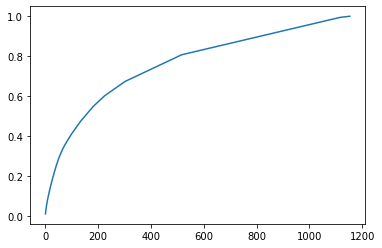

In [116]:
plt.plot(HH_pd['ra'])

In [115]:
HH_pd

,0,1,2,3,4,5,HH,freq,rk,ra
0,0.0,18.0,10.0,10.0,12.0,10.0,34004360.0,70.0,70.0,0.010937
1,0.0,18.0,9.0,10.0,12.0,9.0,30803960.0,68.0,138.0,0.021562
2,15.0,2.0,2.0,7.0,12.0,10.0,33976855.0,64.0,202.0,0.031563
3,15.0,2.0,17.0,7.0,12.0,9.0,30782855.0,64.0,266.0,0.041563
4,0.0,18.0,10.0,9.0,12.0,10.0,33996360.0,58.0,324.0,0.050625
...,...,...,...,...,...,...,...,...,...,...
1149,16.0,2.0,10.0,15.0,11.0,10.0,33884056.0,1.0,6396.0,0.999375
1150,16.0,2.0,10.0,16.0,13.0,10.0,34212056.0,1.0,6397.0,0.999531
1151,17.0,2.0,10.0,17.0,15.0,10.0,34540057.0,1.0,6398.0,0.999687
1152,16.0,1.0,10.0,19.0,9.0,10.0,33596036.0,1.0,6399.0,0.999844


In [119]:
pdHHk = HH_pd[list(range(ftr_len))][HH_pd['ra']<0.8]

In [134]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.spatial.distance import cdist

In [146]:
import umap

In [153]:
HHTSNE = get_tsne(pdHHk)    

(504, 2)


In [147]:
umapT = umap.UMAP(n_components=2,min_dist=0.0,n_neighbors=50, random_state=227)

In [149]:
umapT.fit(HH_pd)

UMAP(min_dist=0.0, n_neighbors=50, random_state=227)

In [ ]:
def get_test_pd(df,ftr,vmin,vrng, umapT,base): 
#     df1=(df-df.mean())/df.std() if std else df
#     assert len(ftr)==len(vmin) & len(ftr)==len(vrng)
#     df_new=((df[ftr]-vmin)/vrng).clip(0,1)*base
    u_da=umapT.transform(df_new)   
    df['u1']=u_da[:,0]
    df['u2']=u_da[:,1]
    return df
def get_mapping_pd(HH_pdc,umapT,ftr_len):
    # lb,ub=int(HH_pd['freq'][0]*lbr),int(HH_pd['freq'][0])
    # HH_pdc=HH_pd[HH_pd['freq']>lb]
    # print(f'lpdc: {len(HH_pdc)} lpd: {len(HH_pd)} ub:{ub} lb:{lb} HHratio:{lbr}')
    u_da=umapT.transform(HH_pdc[list(range(ftr_len))])   
    HH_pdc['u1']=u_da[:,0]
    HH_pdc['u2']=u_da[:,1]
    # sns.scatterplot('u1','u2',data=HH_pdc,alpha=0.7,s=10, color='k', marker="+")
    return HH_pdc


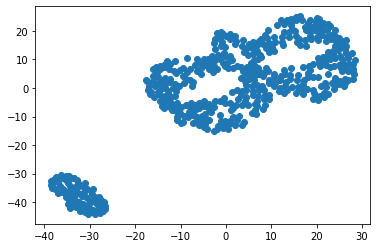

In [154]:
plt.scatter(HHTSNE[:,0],HHTSNE[:,1])

In [141]:
nCluster = 10

In [155]:
cluster_id, min_dist, kmap = get_cluster(HHTSNE, nCluster)

In [158]:
pdHHk['t1'] = HHTSNE[:,0]
pdHHk['t2'] = HHTSNE[:,1]


,0,1,2,3,4,5
0,0.0,18.0,10.0,10.0,12.0,10.0
1,0.0,18.0,9.0,10.0,12.0,9.0
2,15.0,2.0,2.0,7.0,12.0,10.0
3,15.0,2.0,17.0,7.0,12.0,9.0
4,0.0,18.0,10.0,9.0,12.0,10.0
...,...,...,...,...,...,...
499,15.0,2.0,17.0,10.0,12.0,7.0
500,16.0,3.0,18.0,10.0,15.0,11.0
501,0.0,18.0,11.0,10.0,13.0,9.0
502,15.0,2.0,18.0,11.0,13.0,8.0


In [157]:
HHTSNE

array([[-35.344883, -37.304985],
       [-33.522278, -36.055004],
       [-13.592375,  -5.111394],
       ...,
       [-34.59463 , -40.009502],
       [ 22.60058 ,  22.439312],
       [ 22.954601,  21.738691]], dtype=float32)

In [161]:
def get_pd(data, nCluster=10):
    matTSNE = get_tsne(data)        
    cluster_id, min_dist, kmap = get_cluster(matTSNE, nCluster)
    data['t1'] = matTSNE[:,0]
    data['t2'] = matTSNE[:,1]    
    data[f'C{nCluster}'] = cluster_id
    data[f'M{nCluster}'] = min_dist
#     grouped = data.groupby([f'C{nCluster}'])
#     cid = grouped[f'M{nCluster}'].idxmin().values
#     print('center Id:', cid)
#     cMat = data.iloc[cid][keep_columns]
    return data

In [162]:
get_pd(pdHHk)

(504, 2)


,0,1,2,3,4,5,t1,t2,C10,M10
0,0.0,18.0,10.0,10.0,12.0,10.0,-46.618069,24.300230,2,2.899435
1,0.0,18.0,9.0,10.0,12.0,9.0,-45.455757,23.303242,2,1.731130
2,15.0,2.0,2.0,7.0,12.0,10.0,-11.475077,-17.937660,3,6.560844
3,15.0,2.0,17.0,7.0,12.0,9.0,23.917145,10.626630,4,6.735033
4,0.0,18.0,10.0,9.0,12.0,10.0,-47.019039,25.322285,2,3.615115
...,...,...,...,...,...,...,...,...,...,...
499,15.0,2.0,17.0,10.0,12.0,7.0,19.578583,14.541202,10,3.832538
500,16.0,3.0,18.0,10.0,15.0,11.0,28.511919,3.264880,4,3.870501
501,0.0,18.0,11.0,10.0,13.0,9.0,-45.280083,27.219727,2,3.805512
502,15.0,2.0,18.0,11.0,13.0,8.0,20.871269,15.370040,10,5.367210


In [163]:
pdHHk

,0,1,2,3,4,5,t1,t2,C10,M10
0,0.0,18.0,10.0,10.0,12.0,10.0,-46.618069,24.300230,2,2.899435
1,0.0,18.0,9.0,10.0,12.0,9.0,-45.455757,23.303242,2,1.731130
2,15.0,2.0,2.0,7.0,12.0,10.0,-11.475077,-17.937660,3,6.560844
3,15.0,2.0,17.0,7.0,12.0,9.0,23.917145,10.626630,4,6.735033
4,0.0,18.0,10.0,9.0,12.0,10.0,-47.019039,25.322285,2,3.615115
...,...,...,...,...,...,...,...,...,...,...
499,15.0,2.0,17.0,10.0,12.0,7.0,19.578583,14.541202,10,3.832538
500,16.0,3.0,18.0,10.0,15.0,11.0,28.511919,3.264880,4,3.870501
501,0.0,18.0,11.0,10.0,13.0,9.0,-45.280083,27.219727,2,3.805512
502,15.0,2.0,18.0,11.0,13.0,8.0,20.871269,15.370040,10,5.367210


In [135]:
sns.scatterplot(
        x='t1', y='t2',
        hue= kmap.labels_+1 , marker='x',s=5,
        palette=sns.color_palette("muted", kmap.n_clusters),
        data=data,
        legend="full")

ValueError: Could not interpret input 't1'

In [ ]:
matTSNE = get_tsne(matPCA)    
    cluster_id, min_dist, kmap = get_cluster(matTSNE, nCluster)
    data['t1'] = matTSNE[:,0]
    data['t2'] = matTSNE[:,1]    
    data[f'C{nCluster}'] = cluster_id
    data[f'M{nCluster}'] = min_dist
    grouped = data.groupby([f'C{nCluster}'])
    cid = grouped[f'M{nCluster}'].idxmin().values
    print('center Id:', cid)
    cMat = data.iloc[cid][keep_columns]

In [120]:
get_tsne(pdHHk)

NameError: name 'get_tsne' is not defined

In [ ]:
get_tsne(matPca)

In [96]:
exactHH

array([[3.4004360e+07, 7.0000000e+01],
       [3.0803960e+07, 6.8000000e+01],
       [3.3976855e+07, 6.4000000e+01],
       ...,
       [3.4540057e+07, 1.0000000e+00],
       [3.3596036e+07, 1.0000000e+00],
       [3.5164099e+07, 1.0000000e+00]])

In [ ]:
exact = True
get_HH_pd(stream,base,ftr_len, dtype, exact, topk, r=16, d=1000000,c=None,device=None)

In [89]:
get_tsne(matPca)

(6400, 2)


array([[ 76.70963 ,  12.888968],
       [100.54581 ,  17.022472],
       [ 98.85056 ,  14.648542],
       ...,
       [ 98.85057 ,  14.648542],
       [100.54581 ,  17.022472],
       [ 76.70937 ,  12.888983]], dtype=float32)

In [88]:
matPca.shape

(6400, 6)

### 3. clustering

In [55]:
import umap
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.spatial.distance import cdist

In [121]:
def get_tsne(matPCA):
    matTSNE = TSNE(n_components=2).fit_transform(matPCA)
    print(matTSNE.shape)
    return matTSNE

def get_cluster(outTSNE, nCluster):
    kmap = KMeans(n_clusters=nCluster,n_init=30, algorithm='elkan',random_state=227)
    kmap.fit(outTSNE, sample_weight = None)
    cluster_id = kmap.labels_ + 1
    min_dist = np.min(cdist(outTSNE, kmap.cluster_centers_, 'euclidean'), axis=1)    
    return cluster_id, min_dist, kmap

# def get_centers

def run_hill_simple(DATASET, nCluster=10, PCA_dim = 6):
    data,keep_columns = load_data(DATASET)
    matPCA = get_pca(data,dim=PCA_dim)
    matTSNE = get_tsne(matPCA)    
    cluster_id, min_dist, kmap = get_cluster(matTSNE, nCluster)
    data['t1'] = matTSNE[:,0]
    data['t2'] = matTSNE[:,1]    
    data[f'C{nCluster}'] = cluster_id
    data[f'M{nCluster}'] = min_dist
    grouped = data.groupby([f'C{nCluster}'])
    cid = grouped[f'M{nCluster}'].idxmin().values
    print('center Id:', cid)
    cMat = data.iloc[cid][keep_columns]
    return data,kmap,cMat

In [23]:
def get_tsne(matPca):
    outTSNE = TSNE(n_components=2).fit_transform(matPca)
    print(outTSNE.shape)
    return outTSNE

In [145]:
def get_cluster(outTSNE, nCluster):
    kmap = KMeans(n_clusters=nCluster,n_init=30, algorithm='elkan',random_state=1178)
    kmap.fit(outTSNE, sample_weight = None)
    cluster_id = kmap.labels_ + 1
    min_dist = np.min(cdist(outTSNE, kmap.cluster_centers_, 'euclidean'), axis=1)    
    return cluster_id, min_dist, kmap

In [28]:
outTSNE = get_tsne(matPca)

(6400, 2)


In [41]:
nCluster = 10
lbl = get_cluster(outTSNE, nCluster)

In [44]:
def get_lbl_txt(lbl):
    for i in range(1,11):
        c = np.where(lbl==i)[0]+1   
        print(c[:3])
        np.savetxt(f'../../out/kmat_c{i}.txt', c, fmt="%d")    

In [60]:
min_dist = np.min(cdist(outTSNE, kmap.cluster_centers_, 'euclidean'), axis=1)

In [64]:
X = pd.DataFrame(outTSNE)

In [ ]:
Y = pd.DataFrame(min_dist, index=X.index, columns=['Center_euclidean_dist'])

In [144]:
min_dist.shape

(6400,)

In [69]:
Y = pd.DataFrame(min_dist, index=X.index, columns=['Center_euclidean_dist'])
Z = pd.DataFrame(kmap.labels_, index=X.index, columns=['cluster_ID'])
PAP = pd.concat([Y,Z], axis=1)
grouped = PAP.groupby(['cluster_ID'])
cid = grouped.idxmin()

In [126]:
PAP[:100]

,Center_euclidean_dist,cluster_ID
0,11.419576,2
1,16.906010,2
2,15.214278,2
3,15.373388,2
4,15.263493,2
...,...,...
95,24.827466,9
96,22.306040,9
97,24.565321,9
98,22.453333,1


In [123]:
cid

array([2311,  104,  646, 2190, 2614, 2948,  274, 1609, 2524, 5375])

In [79]:
cid = cid.values.flatten()

In [81]:
c10 = data.loc[cid,:]

In [83]:
c10.to_csv('../../out/kmat_centers.csv')

[1590 1591 1668]
[19 20 21]
[1 2 3]
[1621 1622 1623]
[1652 1653 1654]
[2331 2332 2333]
[31 32 33]
[812 813 814]
[1873 1874 1953]
[14 15 16]


In [ ]:
def get_lbl_idx(lbl)

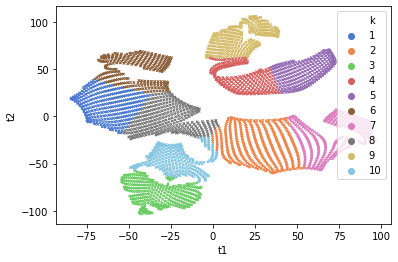

In [46]:
sns.scatterplot(
            x='t1', y='t2',
            hue= 'k' , marker='x',s=5,
            palette=sns.color_palette("muted", nCluster),
            data=mat_pd,
            legend="full")

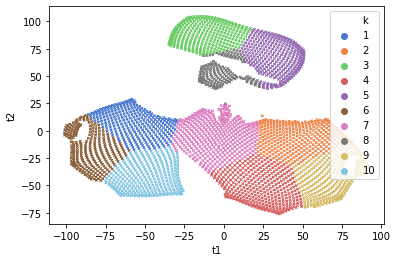

In [147]:
sns.scatterplot(
            x='t1', y='t2',
            hue= 'k' , marker='x',s=5,
            palette=sns.color_palette("muted", N_cluster),
            data=mat_pd,
            legend="full")

In [174]:
os.getcwd()

'/home/swei20/sketch-scale/nb/explore'

In [176]:

for i in range(1,11):
    c = list(mat_pd[mat_pd['k']==i].index+1)
    print(c[:3])
    np.savetxt(f'../../out/c{i}.txt', c, fmt="%d")    

[20, 21, 22]
[80, 710, 711]
[1621, 1622, 1623]
[1056, 1057, 1058]
[1638, 1639, 1640]
[29, 30, 31]
[1, 2, 3]
[159, 2040, 2041]
[2159, 2160, 2161]
[24, 25, 26]


In [162]:
# np.savetxt('c8.txt', c8, delimiter=' ')
np.savetxt('c.txt', c, fmt="%d")

In [158]:
len(c8)

358

In [130]:
sns.scat

,pca1,pca2,pca3,pca4,pca5,pca6,t1,t2,k
0,-0.138574,-7.889492e-13,0.300579,-0.613332,-1.141530e-13,-7.456915e-14,-3.178666,-13.910485,7
1,-0.386611,3.678431e-02,0.024897,-0.825244,8.011921e-03,-8.725821e-03,2.556963,11.240433,7
2,-0.364561,9.010014e-03,0.011831,-0.794359,1.319885e-02,-1.268603e-03,2.585839,13.735167,7
3,-0.371571,-6.269705e-03,0.007580,-0.794364,1.372846e-03,7.387093e-05,0.953780,14.646489,7
4,-0.376140,-1.970535e-02,0.007650,-0.785896,3.304982e-03,1.604008e-03,-1.247897,14.405281,7
...,...,...,...,...,...,...,...,...,...
6395,-0.376140,-1.970535e-02,0.007650,-0.785896,3.304982e-03,1.604008e-03,-1.247897,14.405281,7
6396,-0.371571,-6.269705e-03,0.007580,-0.794364,1.372846e-03,7.387093e-05,0.953735,14.646589,7
6397,-0.364561,9.010014e-03,0.011831,-0.794359,1.319885e-02,-1.268603e-03,2.585838,13.735166,7
6398,-0.386611,3.678431e-02,0.024897,-0.825244,8.011921e-03,-8.725821e-03,2.556963,11.240434,7


In [ ]:
kmap.labels_ + 1 

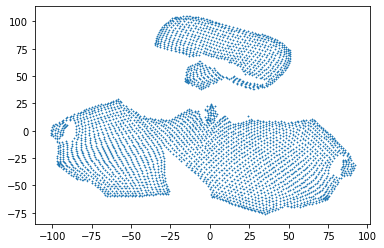

In [121]:
plt.scatter(X_embedded[:,0],X_embedded[:,1],s=0.3)

In [115]:
def get_umap_pd(matPca):
    
    umapT = umap.UMAP(n_components=2,min_dist=0.0,n_neighbors=50, random_state=1178)
    umap_result = umapT.fit_transform(matPca)
    return umap_result

In [116]:
umapT = umap.UMAP(n_components=2,min_dist=0.0,n_neighbors=50, random_state=1178)


In [117]:
umapT.fit(matPca)

TypeError: a bytes-like object is required, not 'list'

In [93]:
umap_result = umapT.fit_transform(matPca)

TypeError: a bytes-like object is required, not 'list'

In [89]:
umaped= get_umap_pd(matPca)

TypeError: a bytes-like object is required, not 'list'

In [ ]:
plt.scatter(embedding[:, 0], embedding[:, 1],

In [40]:
cov = mat.T.dot(mat)

In [41]:
cov.shape

(17, 17)

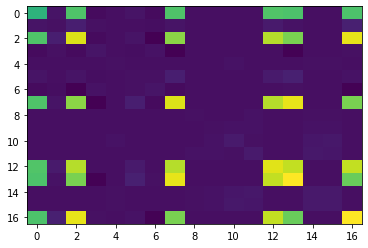

In [42]:
plt.imshow(cov,aspect='auto')

In [ ]:
plt.imshow(np.log(cov),aspect='auto',interpolation ='nearest')

In [31]:
def get_pc(cov,dim):
    # use svd since its commputational faster
    logging.info("=============== PCA: {} ===============".format(dim))
    u,s,v = np.linalg.svd(cov)
    assert np.allclose(u, v.T)
    logging.info('Explained Variance Ratio {}'.format(np.round(s/sum(s),3)))
    pc = u[:,:dim]
    return pc, s

In [43]:
cov.shape

(17, 17)

In [47]:
u,s,v = np.linalg.svd(cov)

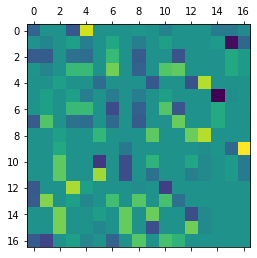

In [48]:
plt.matshow(v.T)

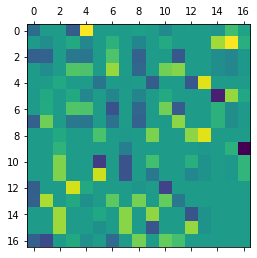

In [49]:
plt.matshow(u)

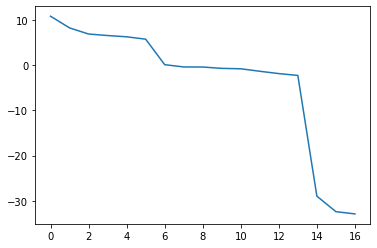

In [51]:
plt.plot(np.log(s))

In [35]:
assert np.allclose(u, v.T)

AssertionError: 

In [32]:
dim=17
get_pc(cov, dim)

AssertionError: 